# Goal
Conduct a power analysis using evident tool https://github.com/biocore/evident

# Init

In [1]:
import evident
import pandas as pd
import os
from evident.plotting import plot_power_curve
import numpy as np
import matplotlib.pyplot as plt

# Load

In [2]:
pwd

'/Users/abogdanova/Desktop/abogdanova/psoriasis/remote/Gut-microbiota-in-Psoriasis/power_analysis'

In [3]:
os.chdir('/Users/abogdanova/Desktop/abogdanova/psoriasis/remote/Gut-microbiota-in-Psoriasis/power_analysis')


In [7]:
tax_PS_PCs = pd.read_table("./PCs_status_clr.txt", sep="\t", index_col=0)

In [8]:
tax_PS_PCs

,Diagnosis,Calprotectin,PC1,PC2,PC3,PC4
ID,,,,,,
D9_profile,control,13.25,18.408583,-16.338130,13.112841,-0.171044
D99_profile,control,17.75,-5.756742,-9.547467,-16.907800,11.957357
D98_profile,control,6.25,4.608204,16.621946,0.157909,1.718582
D97_profile,control,7.10,0.753906,-3.634877,-6.169188,-0.801071
D96_profile,control,6.80,-6.639769,-0.010608,-11.066817,12.074250
...,...,...,...,...,...,...
D13_profile,control,0.65,-20.328224,34.788955,3.295540,2.931762
D12_profile,control,6.30,-3.241667,16.851863,2.892636,4.702483
D11_profile,control,0.00,-5.673136,15.627047,-3.247489,9.945795


# Analysis

In [9]:
tax_PS_PCs.groupby("Diagnosis").agg({'PC1' : ["count", "mean", "std"] })

PC1                     
          count      mean        std
Diagnosis                           
control      47  3.148229  15.441215
psoriasis    53 -2.791826  16.106608

In [10]:
pc1 = tax_PS_PCs["PC1"]

In [11]:
tax_ps_p1 = evident.UnivariateDataHandler(pc1, tax_PS_PCs)

In [12]:
# Now calculate the effect size of this difference
tax_ps_p1.calculate_effect_size(column="Diagnosis")

#EffectSizeResult(effect_size=np.float64(0.3760058621523188), metric='cohens_d', column='Diagnosis')

EffectSizeResult(effect_size=np.float64(0.3760058621523188), metric='cohens_d', column='Diagnosis')

<Axes: xlabel='Total Observations', ylabel='Power (1 - $\\beta$)'>

<Figure size 350x350 with 0 Axes>

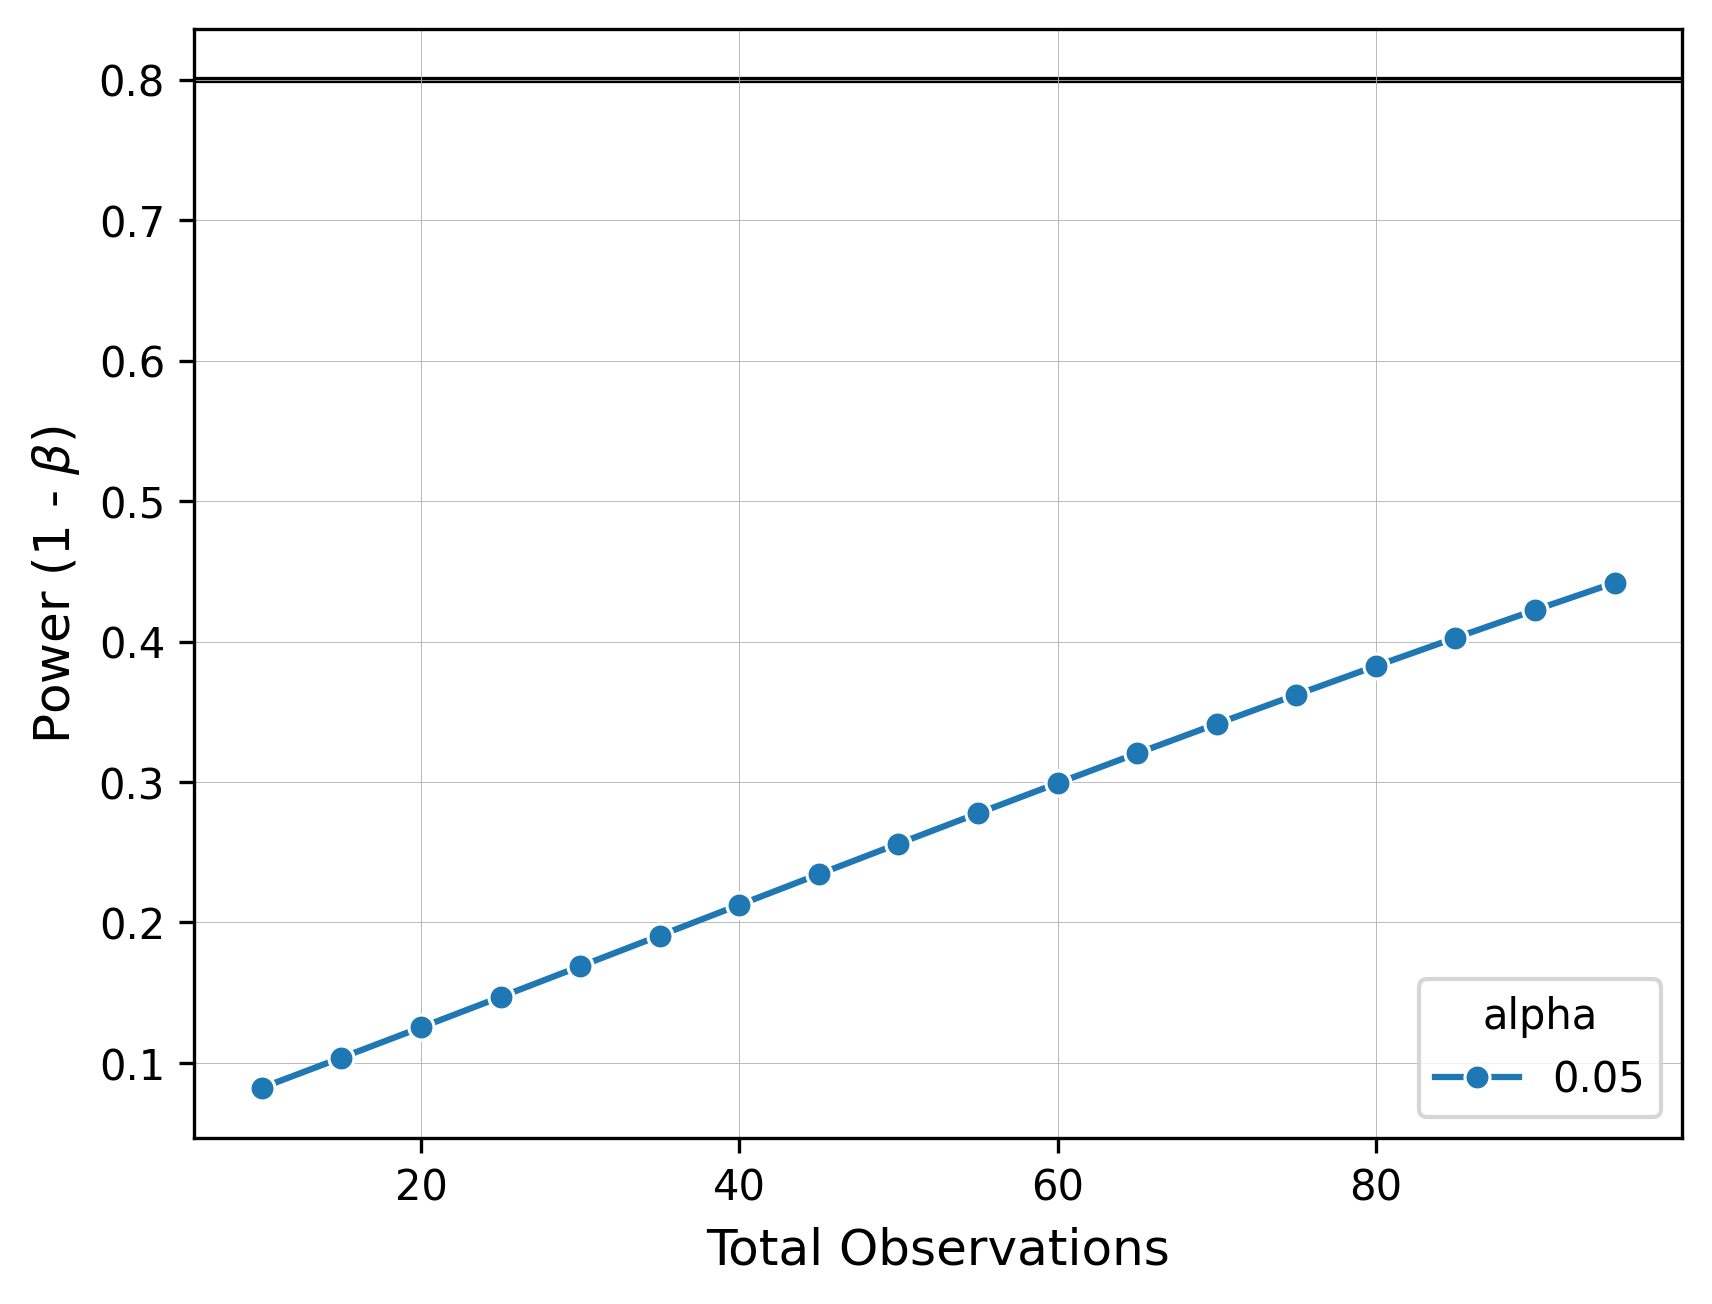

In [14]:
# Set the size of the figure
plt.figure(figsize=(3.5, 3.5))

# Results of the analysis
PS_alpha_vals = [0.05]
PS_obs_vals = np.arange(10, 100, step=5)
PS_P_results_p1 = tax_ps_p1.power_analysis("Diagnosis", alpha=PS_alpha_vals, total_observations=PS_obs_vals)

# Plotting
plot_power_curve(PS_P_results_p1, target_power=0.8, style="alpha", markers=True)

# Save the plot
#plt.savefig('power_analysis_plot.pdf', format='pdf', bbox_inches='tight')
